# Basic Animations with Matplotlib

Based on the material in https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/

In [10]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

## First generate some data to plot

In [11]:
# 2D Data
x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))

# 3D Data
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3

## An animated line

<IPython.core.display.Javascript object>


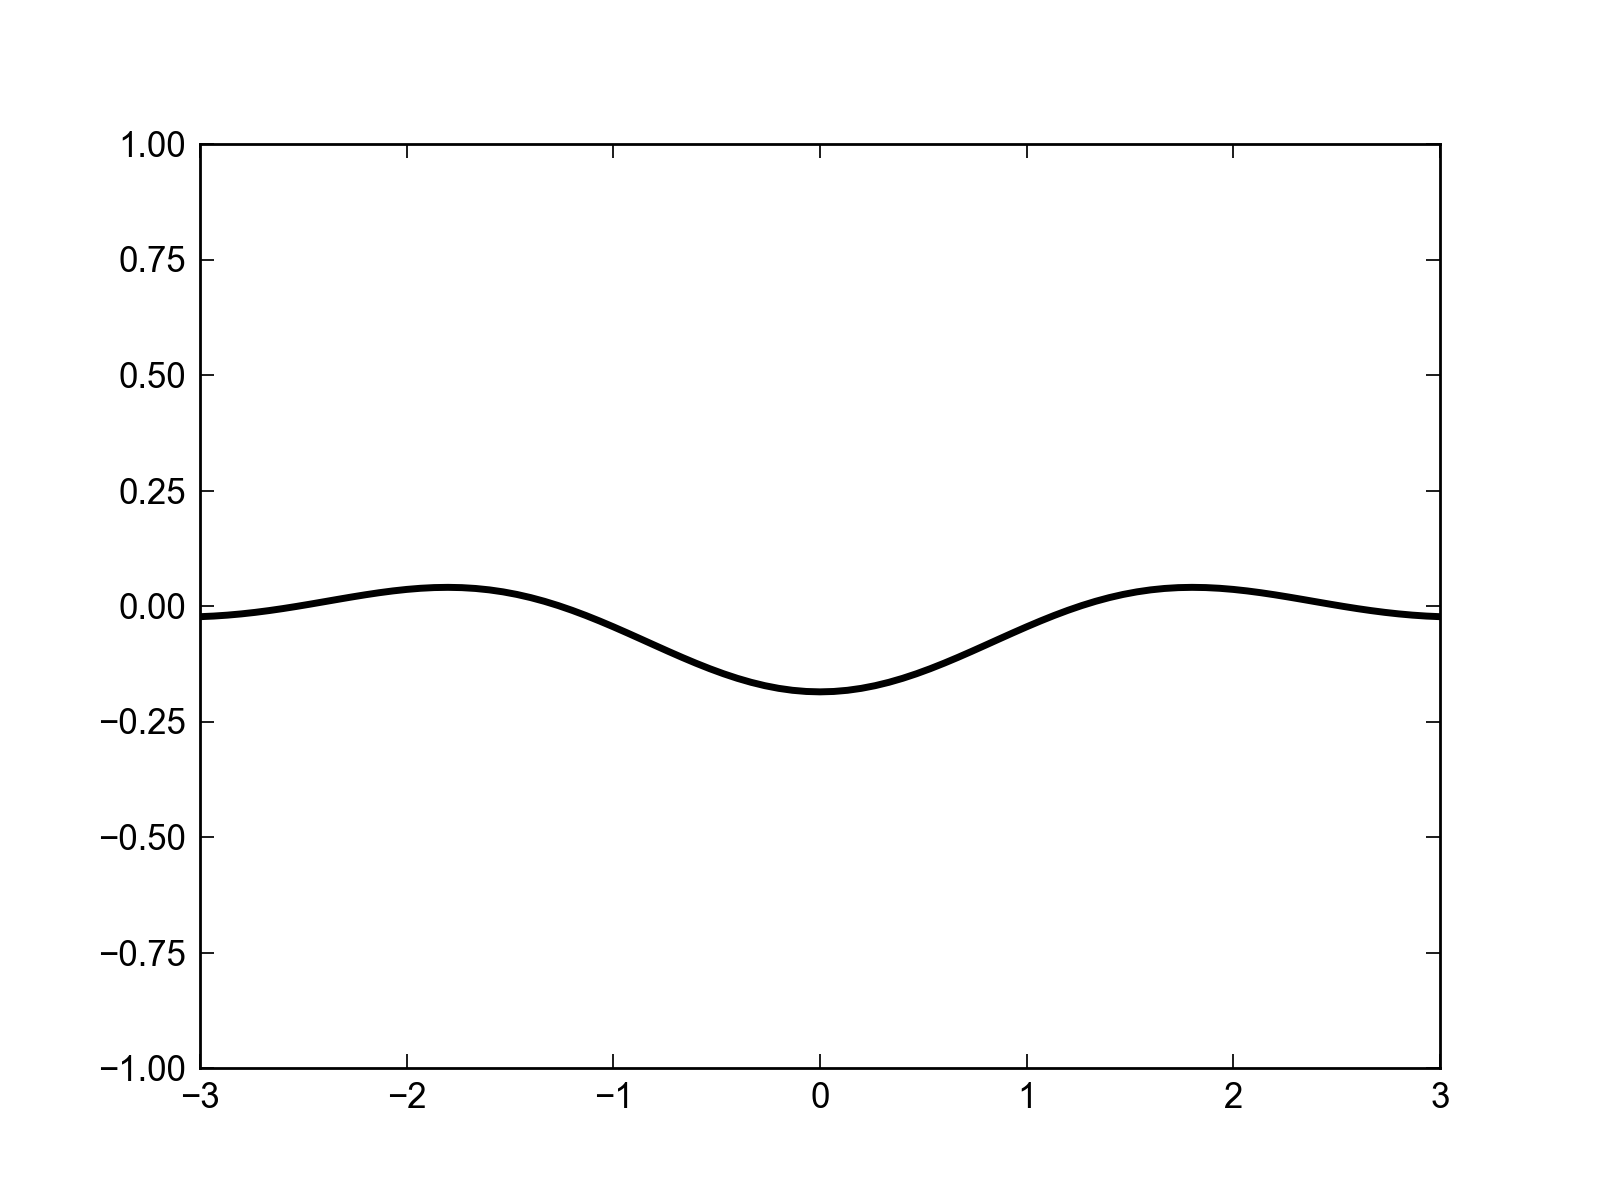

In [12]:
# set up the figure
fig, ax = plt.subplots()
ax.set(xlim=(-3, 3), ylim=(-1, 1))

# create a line object that will be animated
line = ax.plot(x, F[0, :], color='k', lw=2)[0]

# function to update the y data of the line to be animated
def animate(i):
    line.set_ydata(F[i, :])

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)
 
plt.draw()
plt.show()

# save animation to a file
#anim.save('filename.mp4')
#anim.save('filename.gif', writer='imagemagick')

## `pcolormesh`

<IPython.core.display.Javascript object>


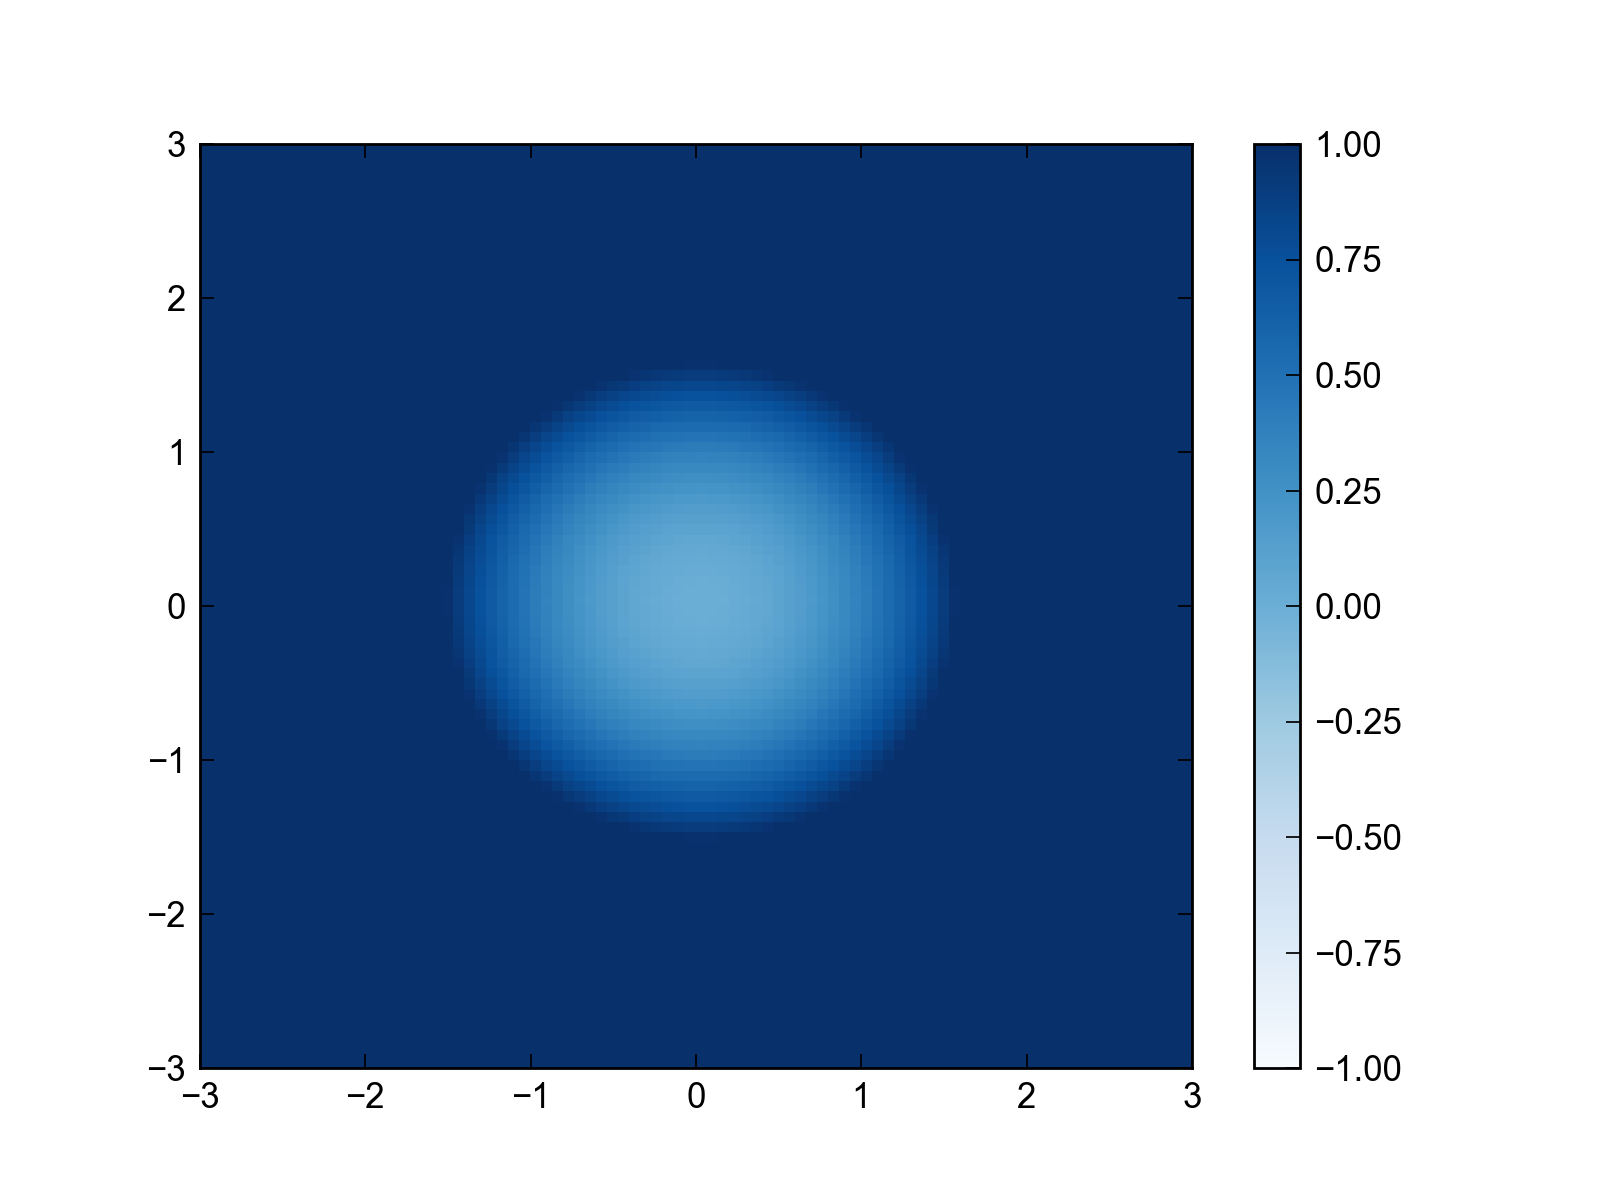

In [13]:
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3

fig, ax = plt.subplots()
cax = ax.pcolormesh(x, y, G[:-1, :-1, 0],vmin=-1, vmax=1, cmap='Blues')
fig.colorbar(cax)
 
def animate(i):
    cax.set_array(G[:-1, :-1, i].flatten())

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)
plt.draw()
plt.show()

## `scatter`

<IPython.core.display.Javascript object>


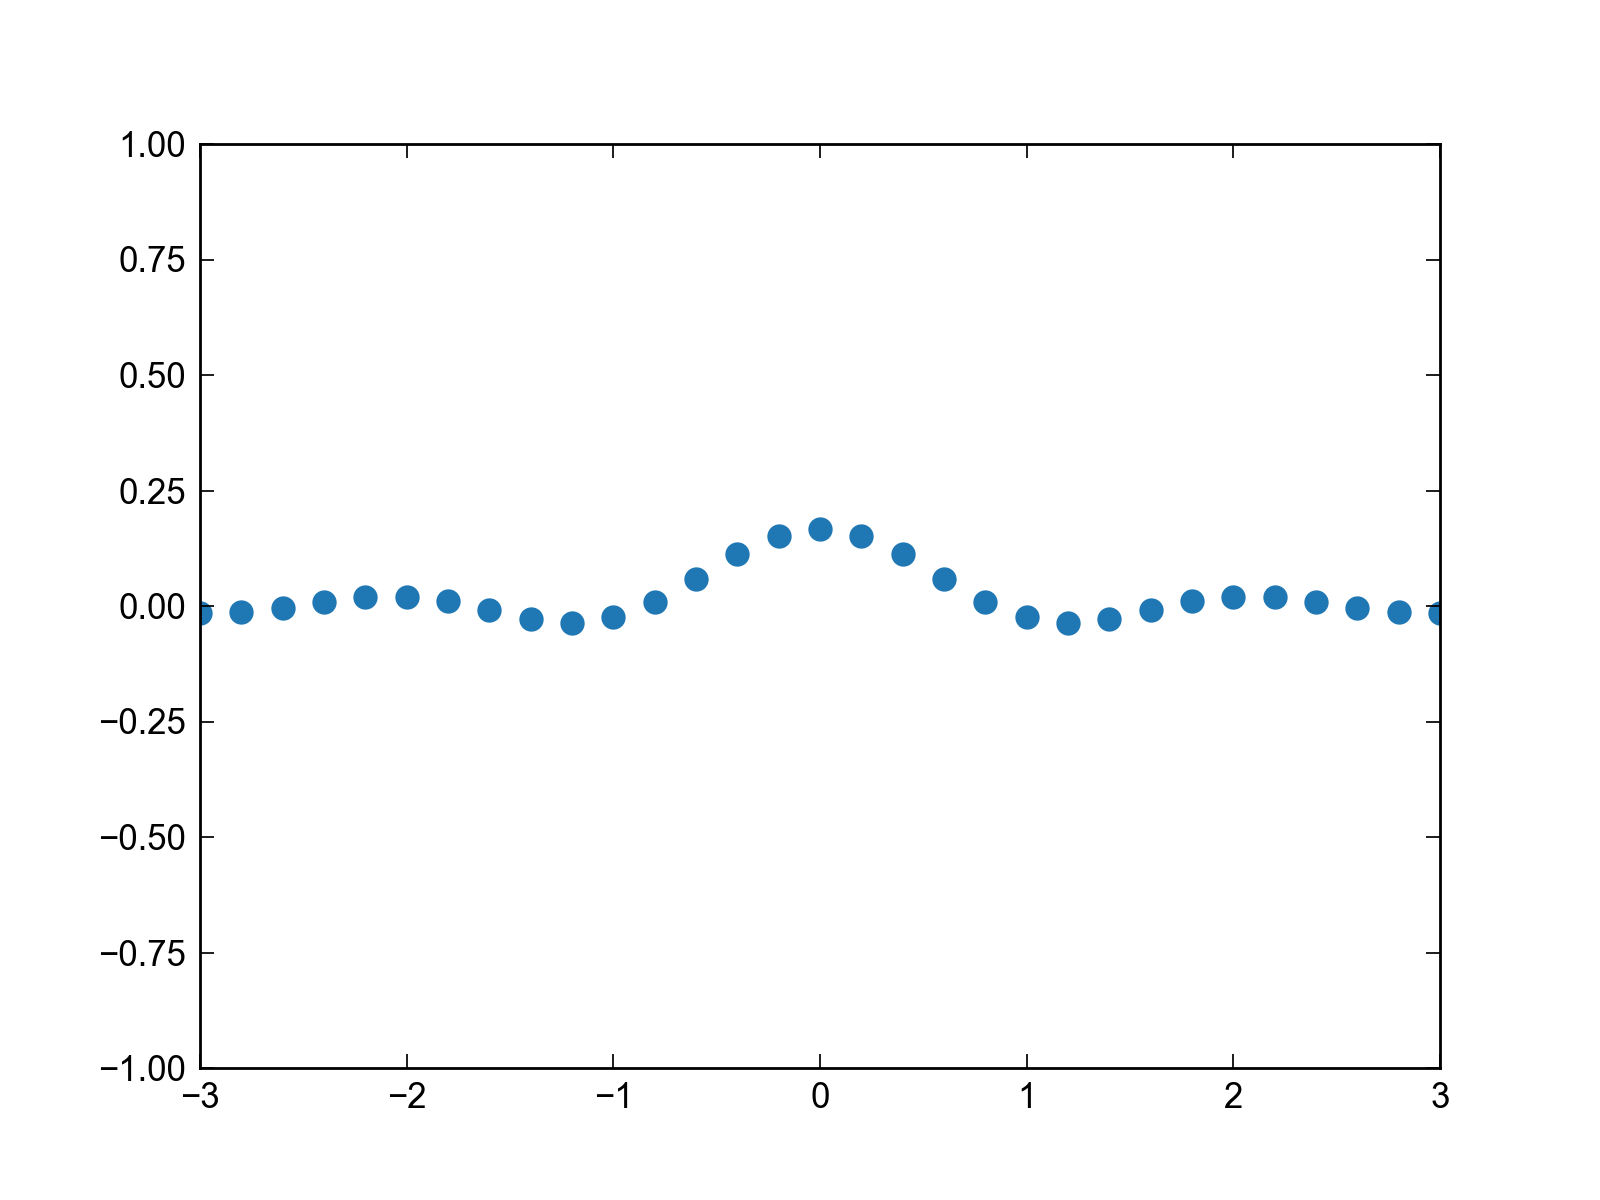

In [14]:
# set up the figure
fig, ax = plt.subplots()
ax.set(xlim=(-3, 3), ylim=(-1, 1))

# create a line object that will be animated
scat = ax.scatter(x[::3], F[0, ::3])

# function to update the y data of the line to be animated
def animate(i):
    y_i = F[i, ::3]
    scat.set_offsets(np.c_[x[::3], y_i])

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)
 
plt.draw()
plt.show()

## `quiver`

<IPython.core.display.Javascript object>


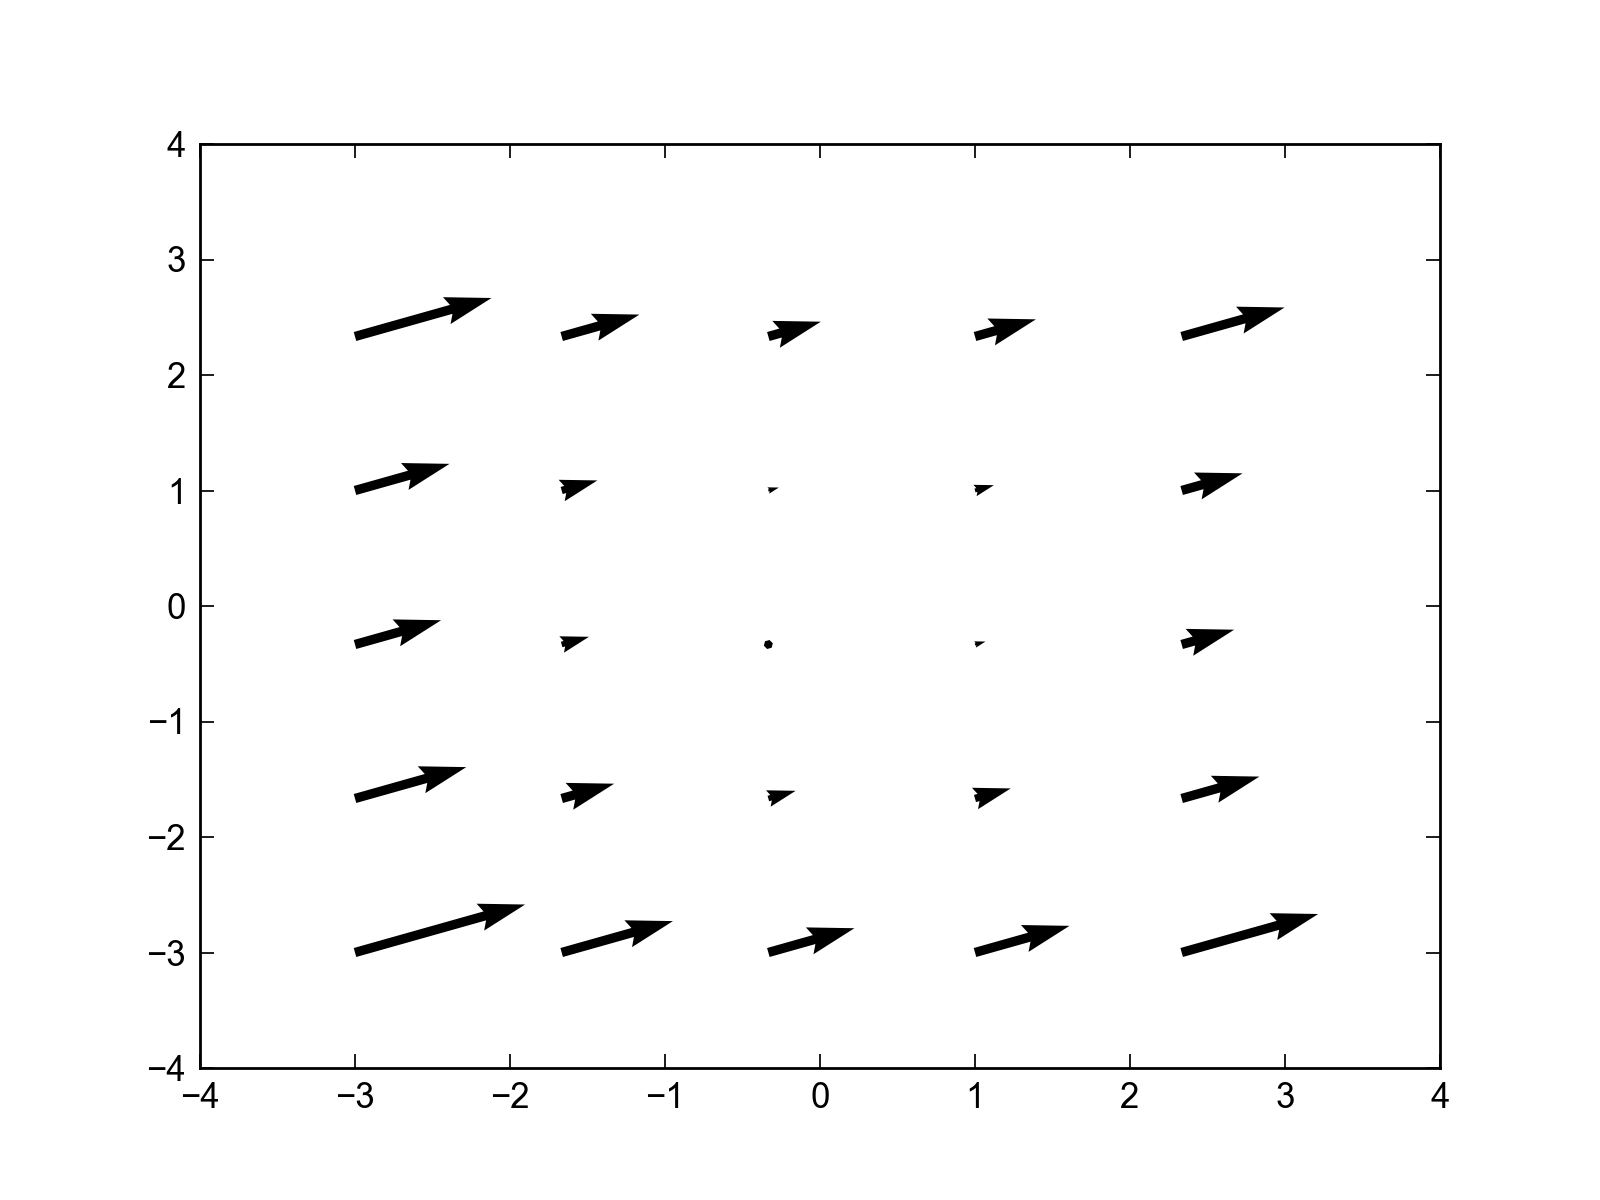

In [15]:
fig, ax = plt.subplots()
ax.set(xlim=(-4, 4), ylim=(-4, 4))
 
# Plot every 20th arrow
step = 20
x_q, y_q = x[::step], y[::step]
 
# Create U and V vectors to plot
U = G[::step, ::step, :]
V = np.roll(U, shift=3, axis=2)
 
qax = ax.quiver(x_q, y_q,U[..., 0], V[..., 0],scale=100)
 
def animate(i):
    qax.set_UVC(U[..., i], V[..., i])

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)
plt.draw()
plt.show()

## `contour`

<IPython.core.display.Javascript object>


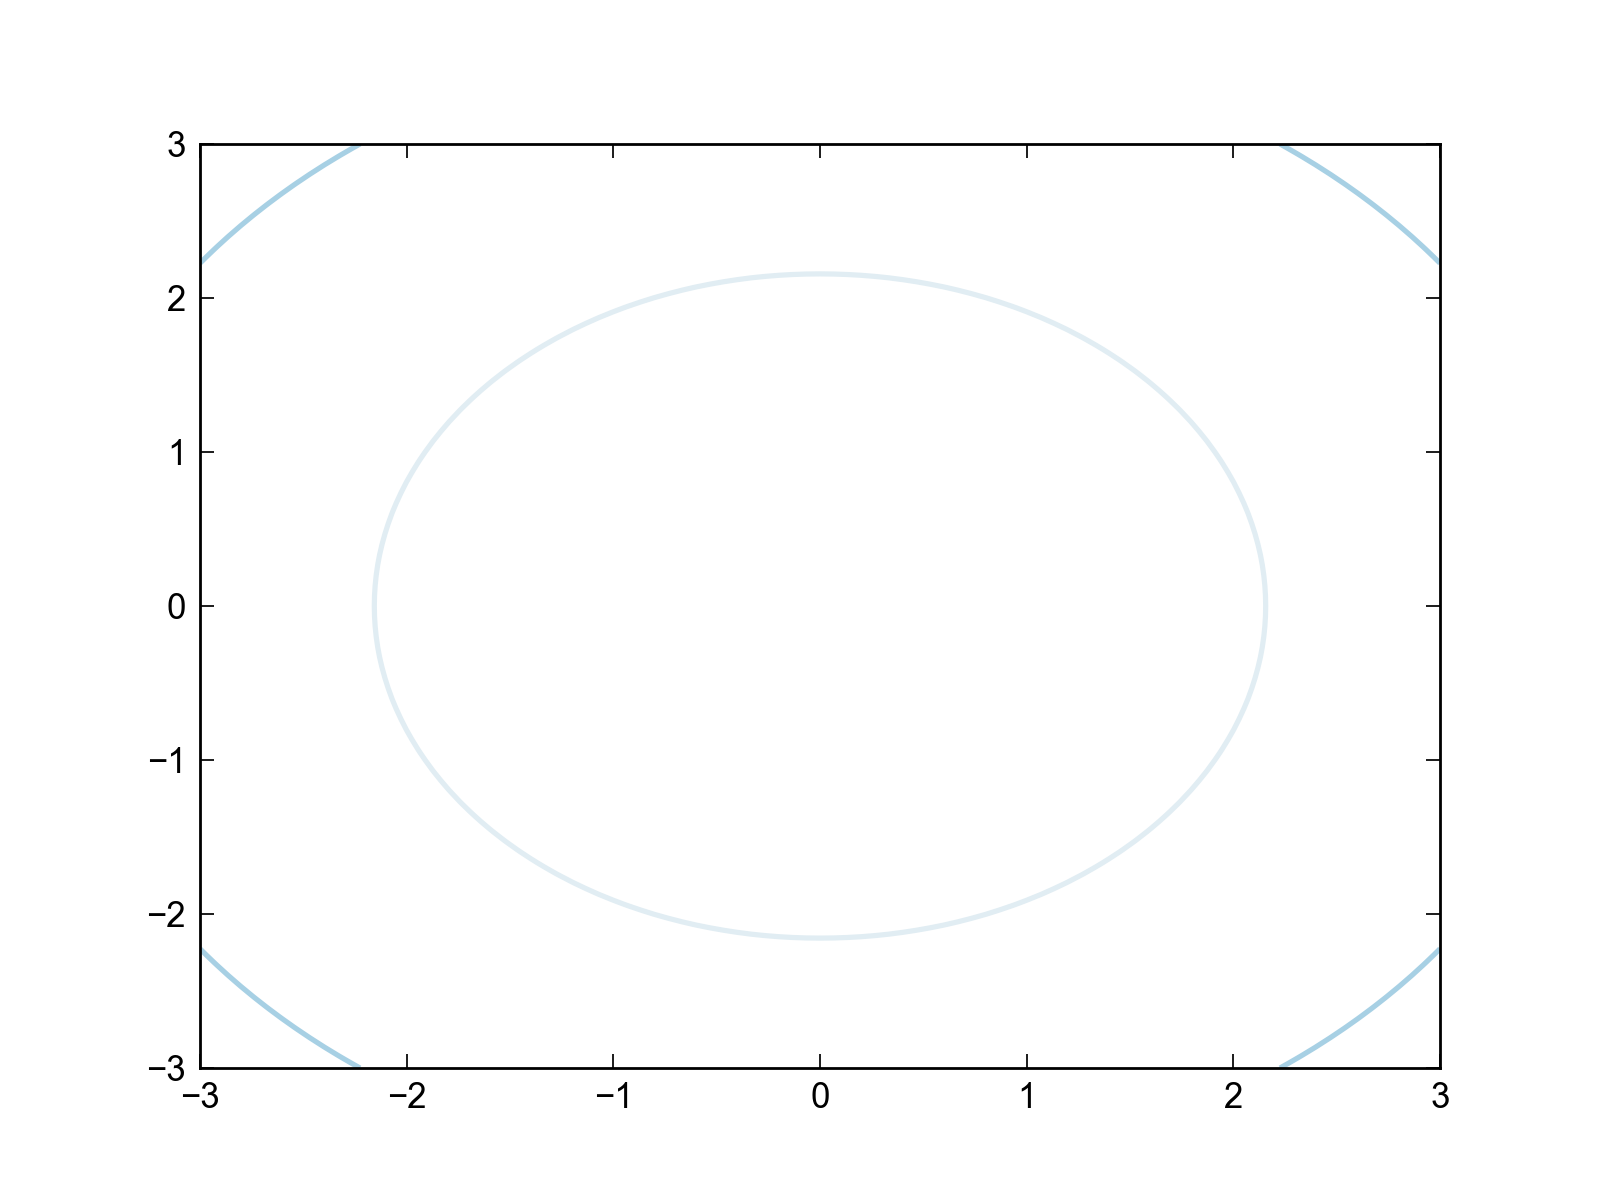

In [16]:
fig, ax = plt.subplots()
ax.set(xlim=(-3, 3), ylim=(-3, 3))
 
# Plot every 20th arrow
step = 20
x_q, y_q = x[::step], y[::step]
 
# Create U and V vectors to plot
U = G[::step, ::step, :]
V = np.roll(U, shift=3, axis=2)
 
contour_opts = {'levels': np.linspace(-9, 9, 10),'cmap':'RdBu', 'lw': 2}
cax = ax.contour(x, y, G[..., 0], **contour_opts)
 
def animate(i):
    ax.collections = []
    ax.contour(x, y, G[..., i], **contour_opts)

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)
plt.draw()
plt.show()

## Labels and text

<IPython.core.display.Javascript object>


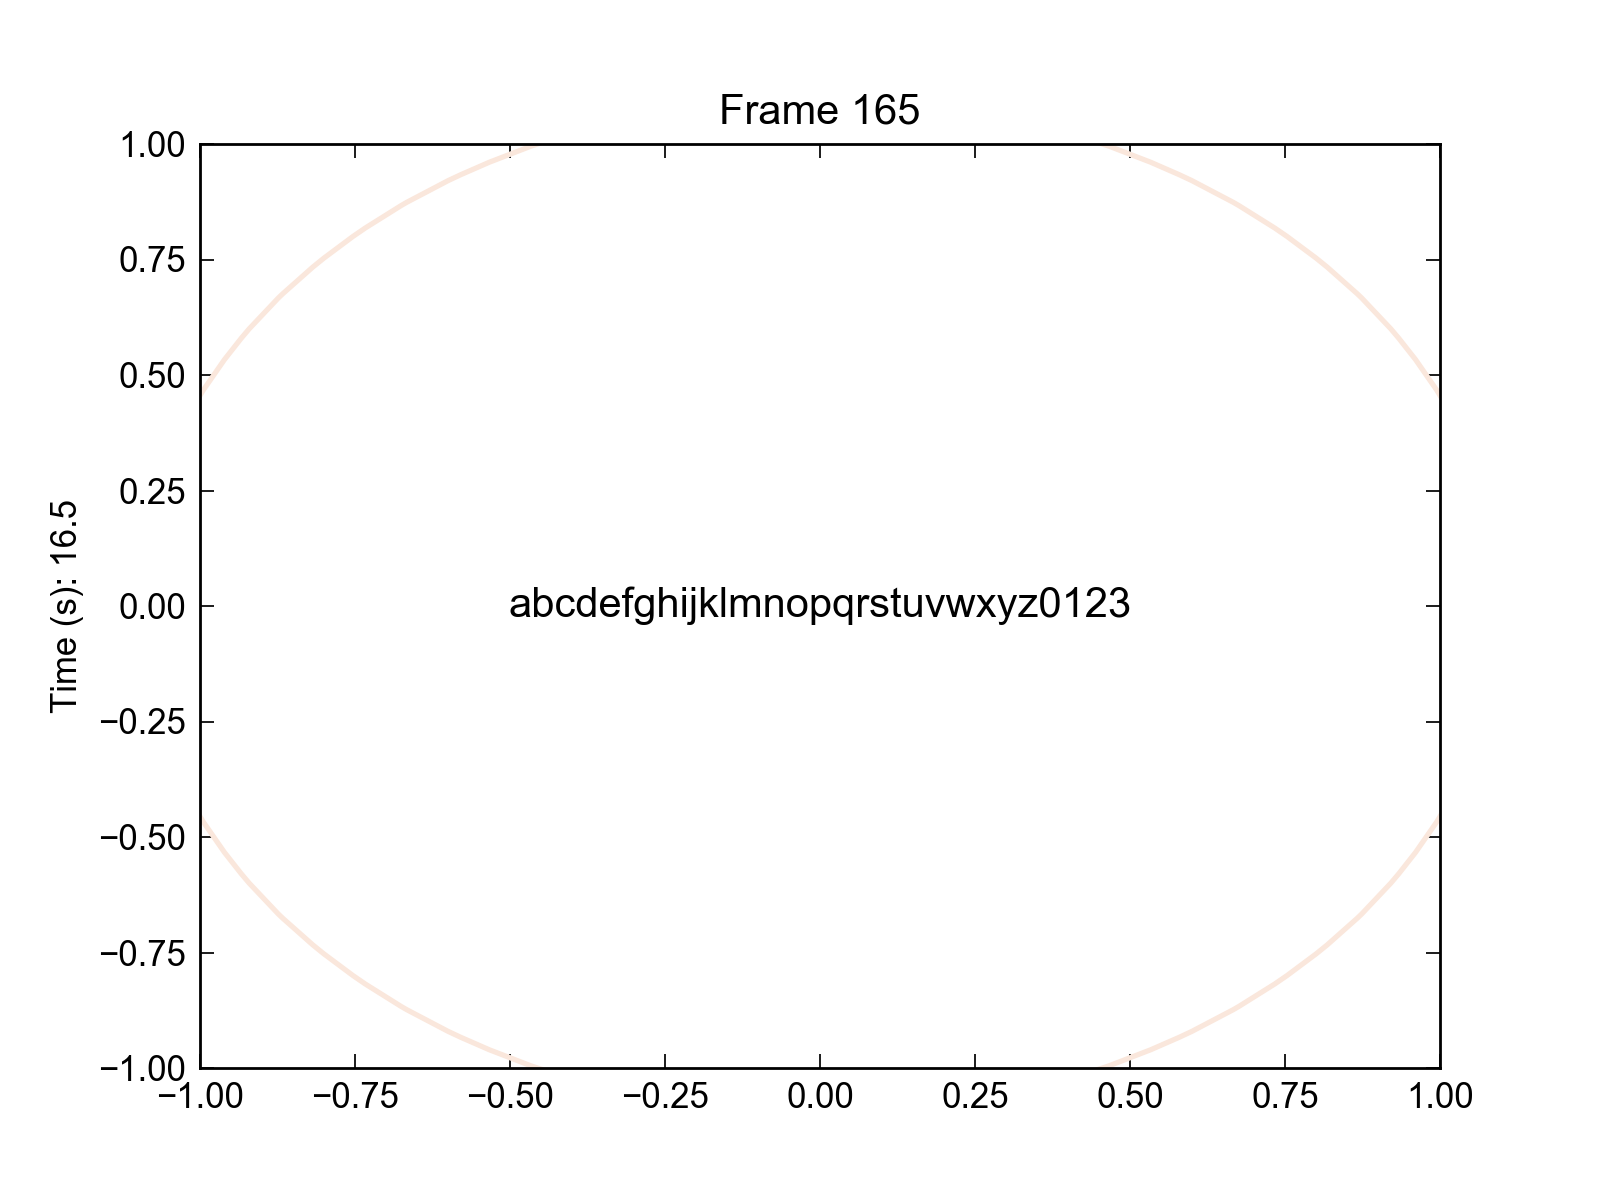

In [17]:
fig, ax = plt.subplots()
ax.set(xlim=(-1, 1), ylim=(-1, 1))
string_to_type = 'abcdefghijklmnopqrstuvwxyz0123'
label = ax.text(0, 0, string_to_type[0],ha='center', va='center',fontsize=12)
 
def animate(i):
    label.set_text(string_to_type[:i+1])
    ax.set_ylabel('Time (s): ' + str(i/10))
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate)
plt.draw()
plt.show()